# Теория вероятностей и математическая статистика

## Примеры вычисления и визуализации p-value

Импортируем необходимые библиотеки и модули:
    
* библиотека `numpy`: для работы с массивами;  
* модуль `stats` из библиотеки `scipy` для статистических вычислений;
* модуль `pyplot` из графической библиотеки `matplotlib`.

In [1]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

### Пример 1. Стандартное нормальное распределение

Зафиксируем данные из условия задачи №2 (семинарский листок от 7 апреля) и вычислим оценку совокупной доли:

In [2]:
p1 = 0.02
p2 = 0.035
n = 500
m = 200

sn = n * p1
sm = m * p2
p = (sn + sm) / (n + m)

Вспомним формулу для наблюдаемого значения статистики z-критерия для сравнения двух долей:


$$
z_{\text{набл}} = \frac{\hat{p}_2 - \hat{p}_1}{\sqrt{\hat{p}(1-\hat{p})(\frac{1}{n} + \frac{1}{m}})}
$$

Вычислим его:

In [3]:
z_obs = (p2 - p1) / np.sqrt(p * (1 - p) * (1 / n + 1 / m))
print("Наблюдаемое значение статистики критерия:", round(z_obs, 2))

Наблюдаемое значение статистики критерия: 1.16


Зафиксируем гипотезы и определение p-value для данного случая:

$$
H_0: p_1 = p_2
$$
$$
H_1: p_1 < p_2
$$

$$
\text{p-value} = \text{P}(Z > z_{\text{набл}})
$$

Для вычисления необходимой вероятности создадим, используя возможности модуля `stats`, объект типа *случайная величина* (подробнее – [здесь](https://docs.scipy.org/doc/scipy/reference/stats.html)). В данном случае – это нормальная случайная величина с математическим ожиданием 0 и стандартным отклонением 1:

In [4]:
a = 0
sigma = 1

Z = stats.norm(loc = a, scale = sigma)
print(type(Z)) # rv – random variable

<class 'scipy.stats._distn_infrastructure.rv_frozen'>


Воспользуемся методом `.cdf()` для вычисления функции распределения в точке (от *cumulative density function*):

In [5]:
pvalue = 1 - Z.cdf(z_obs)
print("P-value:", round(pvalue, 3))

P-value: 0.122


P-value нашли, оно достаточно большое, чтобы на любом из распространенных уровней значимости (1%, 5%, 10%) не отвергнуть нулевую гипотезу и считать, что конверсия нового сайта интернет-магазина не отличается от конверсии старого. 

Визуализируем полученный результат – построим график плотности и закрасим нужную площадь под графиком. Чтобы это сделать, нам потребуется набор точек, в которых Python вычислит значения функции плотности, так как библиотека `matplotlib` строит графики именно по точкам. Общая идея: 

* формируем массив значений на некотром отрезке – это значения по горизонтальной оси;
* вычисляем функцию плотности для каждого значения полученного массива  – это значения по вертикальной оси;
* наносим точки на график и соединяем их линией – ровно так работает функция `plot()`.

Для получения массива значений, равноудаленных друг от друга, и взятых из определенного отрезка, применим функцию `linspace()` из `numpy` (от *linear space*).

In [6]:
# 3 равноудаленных точки на отрезке [0, 1]
# шаг равен 1 / (3 - 1) = 0.5

print(np.linspace(0, 1, 3))

# 9 равноудаленных точек на отрезке [0, 1]
# шаг равен 1 / (9 - 1) = 0.125

print(np.linspace(0, 1, 9))

[0.  0.5 1. ]
[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]


Какой отрезок разумно взять в данном случае? Применим правило трех сигм и вычислим границы интервала, на котором лежит примерно 99.8% значений. При этом возьмем из этого интервала побольше точек, например, 500:

In [7]:
z = np.linspace(a - 3 * sigma, a + 3 * sigma, 500)
z_pdf = Z.pdf(z)

# примеры пар точек, которые будем соединять на графике
print(*zip(z[0:5], z_pdf[0:5]), sep = "\n")

(-3.0, 0.0044318484119380075)
(-2.987975951903808, 0.004594300902763393)
(-2.975951903807615, 0.004762019671027892)
(-2.963927855711423, 0.00493514758812422)
(-2.9519038076152304, 0.005113830341782406)


Нанесем точки с зафиксированными координатами на график:

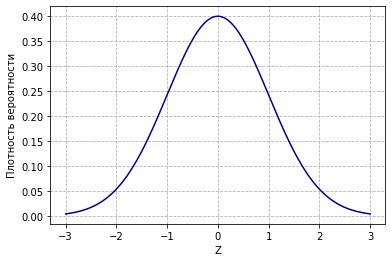

In [8]:
# добавим сетку grid
# и подписи к осям

plt.plot(z, z_pdf, color = "darkblue");
plt.grid(linestyle = "--");
plt.xlabel("Z");
plt.ylabel("Плотность вероятности");

Готово! Осталось закрасить площадь под графиком, соответствующую p-value. Для этого в модуле `pyplot` есть специальная функция `fill_between()`. Внутри этой функции нужно задать ограничения для заливки цветом по оси X и по оси Y. В нашем случае p-value – это вероятность превысить значение `z_obs`, значит, по горизонтальной оси ограничение – интервал от `z_obs` до `a + 3 * sigma`, так как $+\infty$ на нашем графике нет. Если мы вычислим значения плотности распределения в точках на этом участке, мы получим естественное ограничение по вертикальной оси. Итого:

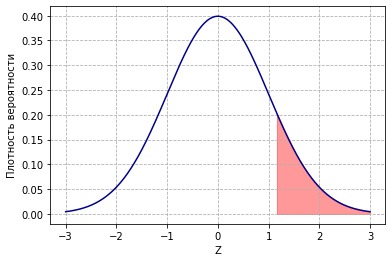

In [9]:
plt.plot(z, z_pdf, color = "darkblue");
plt.grid(linestyle = "--");
plt.xlabel("Z");
plt.ylabel("Плотность вероятности");

interval = np.linspace(z_obs, a + 3 * sigma)
density = Z.pdf(interval)

# color – цвет, alpha - непрозрачность
plt.fill_between(interval, density, 
                 color = "red", alpha = 0.4);

Для полного счастья улучшим качество графика – добавим функцию `subplots()` и в ней укажем разрешение изображения – и экспортируем его в файл с расширением `.png`:

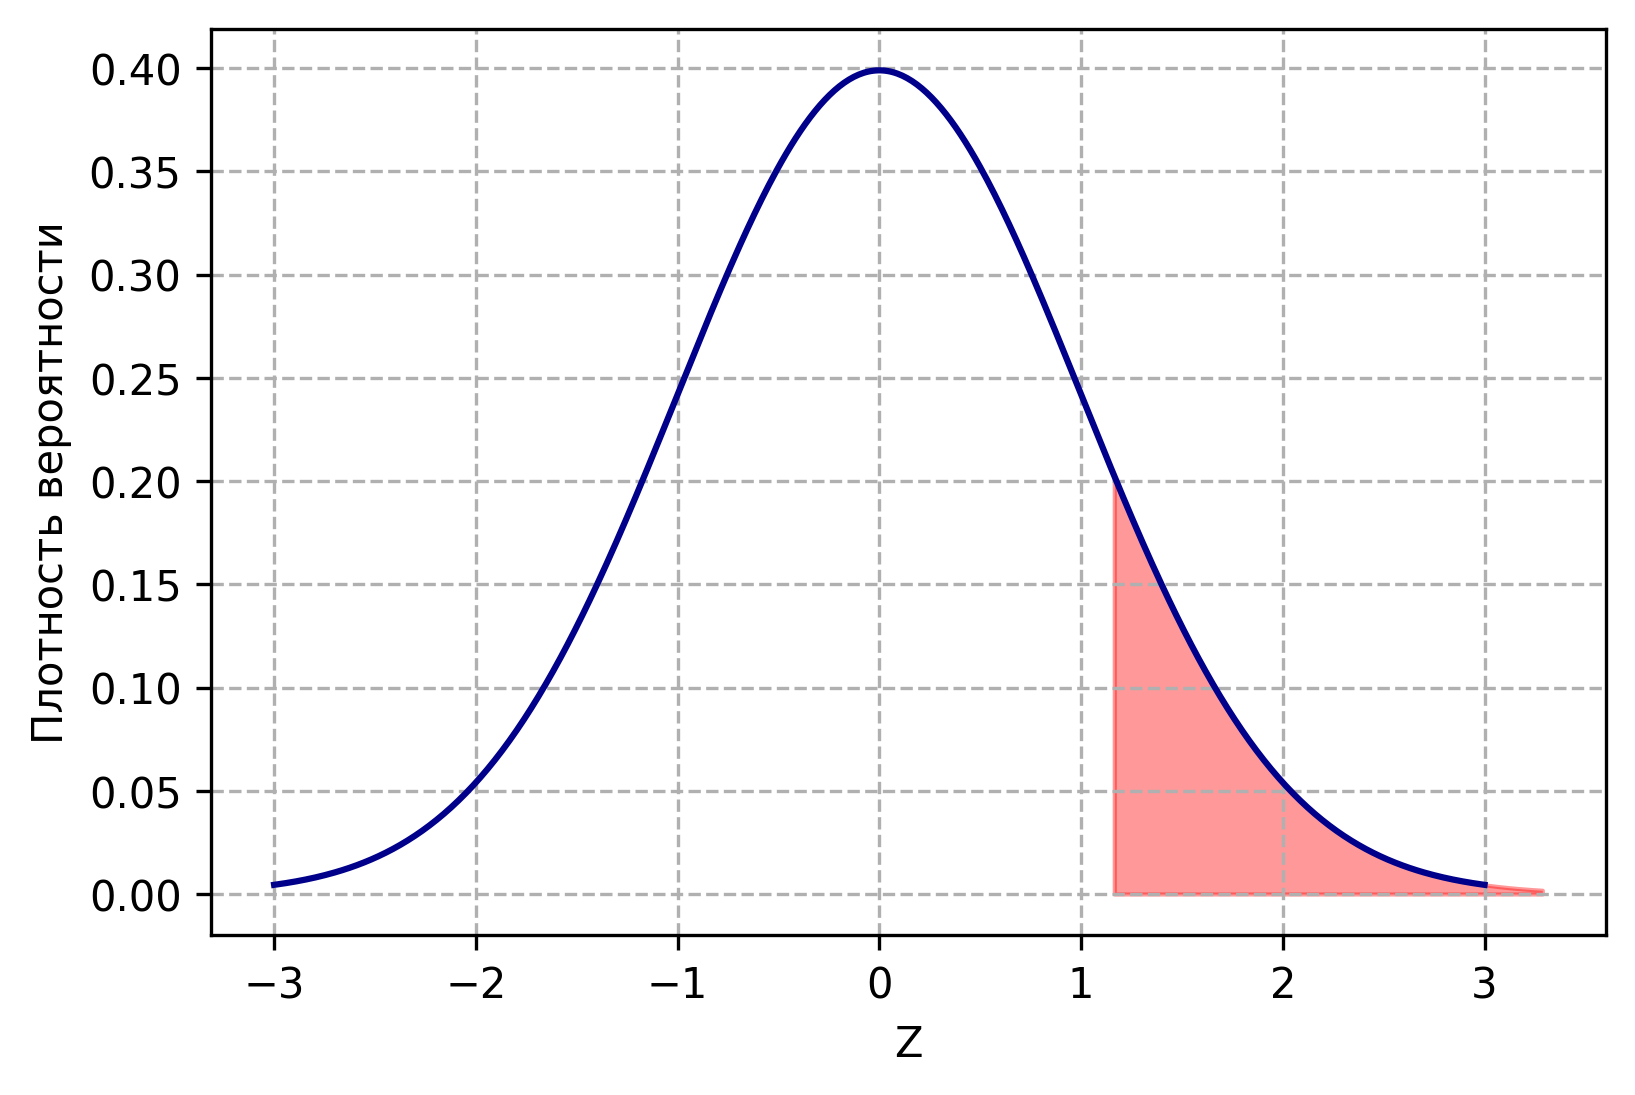

In [18]:
# dpi – dots per inch, число точек на дюйм
# dpi = 300 – хорошее разрешения даже для печати

plt.subplots(dpi = 300)

plt.plot(z, z_pdf, color = "darkblue");
plt.grid(linestyle = "--");
plt.xlabel("Z");
plt.ylabel("Плотность вероятности");

interval = np.linspace(z_obs, a + 3 * sigma)
density = Z.pdf(interval)
plt.fill_between(interval, density, 
                 color = "red", alpha = 0.4);

plt.savefig("example01.png") # проверьте рабочую папку, оно там

### Пример 2. Распределение Стьюдента

Зафиксируем данные из задачи №4 (семинарский листок от 7 апреля), вычислим оценку совокупной дисперсии и наблюдаемое значение статистики двухвыборочного критерия Стьюдента:

In [11]:
x_bar = 10
y_bar = 7
n = 6
m = 8
s2_x = 8
s2_y = 9

# предполагаем, что дисперсии равны

s2 = (s2_x * (n - 1) + s2_y * (m - 1)) / (n + m - 2)
t_obs = (y_bar - x_bar) / np.sqrt(s2 * (1 / n + 1 / m))
print("Наблюдаемое значение статистики критерия:", round(t_obs, 2))

Наблюдаемое значение статистики критерия: -1.9


Для иллюстрации того, что мы делали на семинаре, вычислим границы критической области для значений статистики критерия. 

Зафиксируем гипотезы:

$$
H_0: a_1 = a_2 \text{ }(\sigma^2_1 = \sigma^2_2)
$$
$$
H_1: a_1 \ne a_2 \text{ }(\sigma^2_1 = \sigma^2_2)
$$

Исходя из альтернативы, нам нужна двусторонняя критическая область. Создадим случайную величину, имеющую распределение Стьюдента с $n+m-2$ степенями свободы, и найдём квантиль уровня $1 - \frac{\alpha}{2}$. Для этого нам потребуется метод `.ppf()` (от *percent point function*, функция процентных точек):

In [12]:
T = stats.t(df = n + m - 2)
alpha = 0.05
t_crit = T.ppf(1 - alpha / 2)
print(t_crit)
print(f"Критическая область: (-∞; {-round(t_crit, 2)}] ∪ [{round(t_crit, 2)}; +∞)")

2.1788128296634177
Критическая область: (-∞; -2.18] ∪ [2.18; +∞)


Итак, наблюдаемое значение статистики не попадает в критическую область, нулевая гипотеза не отвергается. Перейдем к p-value:

$$
\text{p-value} = 2\text{P}(T < t_{\text{набл}})
$$

In [13]:
p_value = 2 * T.cdf(t_obs)
print("P-value:", round(p_value, 3))

P-value: 0.082


Чтобы повторить визуализацию, аналогичную первому примеру, тоже применим правило трех сигм (все-таки сходство с нормальным есть, хотя число степеней свободы небольшое) и вспомним, что дисперсия распределения Стьюдента с числом степеней свободы $\text{df}$ равна $\frac{\text{df}}{\text{df}-2}$:

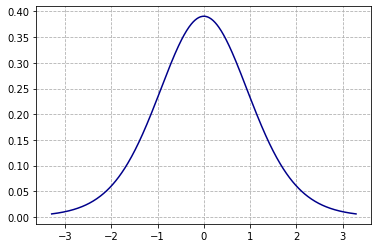

In [14]:
df = n + m - 2
sigma = np.sqrt(df / (df - 2))

t = np.linspace(-3 * sigma, 3 * sigma, 500)
t_pdf = T.pdf(t)

plt.plot(t, t_pdf, color = "darkblue");
plt.grid(linestyle = "--");

Для того, чтобы отметить p-value здесь, нам потребуется уже два интервала:

* от $-\infty$ до `t_obs` (на графике ограничены слева числом `-3 * sigma`);
* от `|t_obs|` до $+\infty$ (на графике ограничены слева числом `3 * sigma`).

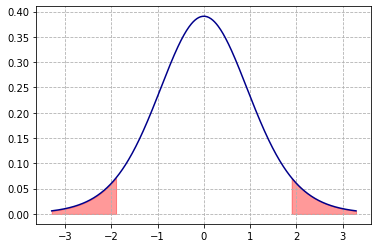

In [19]:
plt.plot(t, t_pdf, color = "darkblue");
plt.grid(linestyle = "--");

interval01 = np.linspace(-3 * sigma, t_obs)
interval02 = np.linspace(abs(t_obs), 3 * sigma)

density01, density02 = T.pdf(interval01), T.pdf(interval02)
plt.fill_between(interval01, density01, 
                 color = "red", alpha = 0.4);
plt.fill_between(interval02, density02, 
                 color = "red", alpha = 0.4);

Чтобы координатная сетка не перекрывала заливку, ее стоит перенести назад, под график. Для этого перейдем к немного иной логике построения графика – сохраним результаты функции `.subplots()` в переменные. Первый результат (назовем `fig`), который возвращает эта функция, это «материальное» изображение, графический объект, который можно экспортировать в файл. Второй результат (назовем `ax`) – это оси (*matplolib axes*), «канва» внутри которой находятся все части графика, доступные для изменений. 

Теперь вместо вызова функций из `plt` нам нужно применить аналогичные методы к осям `ax`. Некоторые методы имеют такое же название, как и функции (например, `.plot()` или `.grid()`, а некоторые – немного другое (`.set_xlabel()` вместо `xlabel()`, `.set_yabel()` вместо `ylabel()`). 

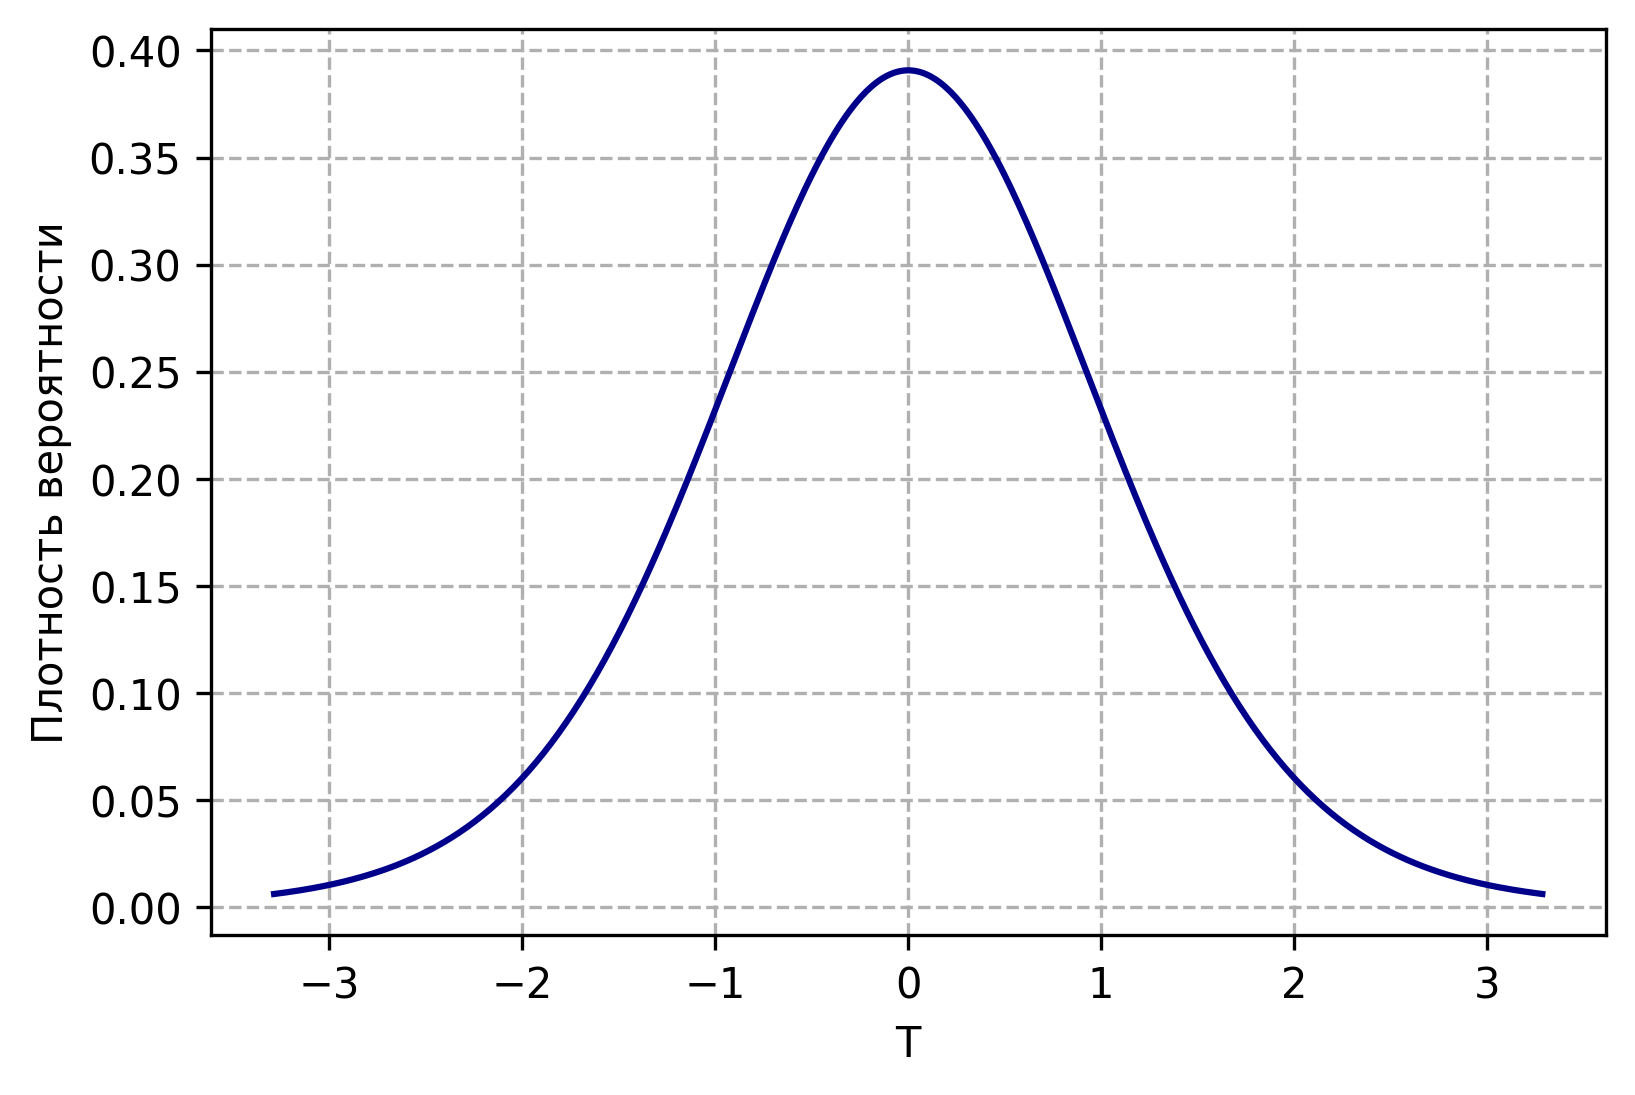

In [16]:
fig, ax = plt.subplots(dpi = 300)

# ax, не plt
ax.plot(t, t_pdf, color = "darkblue");
ax.grid(linestyle = "--");
ax.set_xlabel("T");
ax.set_ylabel("Плотность вероятности");

А ряд операций вообще существует только в виде методов на объектах типа *matplolib axes*. Метод `set_axisbelow()`, который нам нужен для переноса координатной сетки назад, как раз относится к таким операциям, ради него мы это и затеяли:

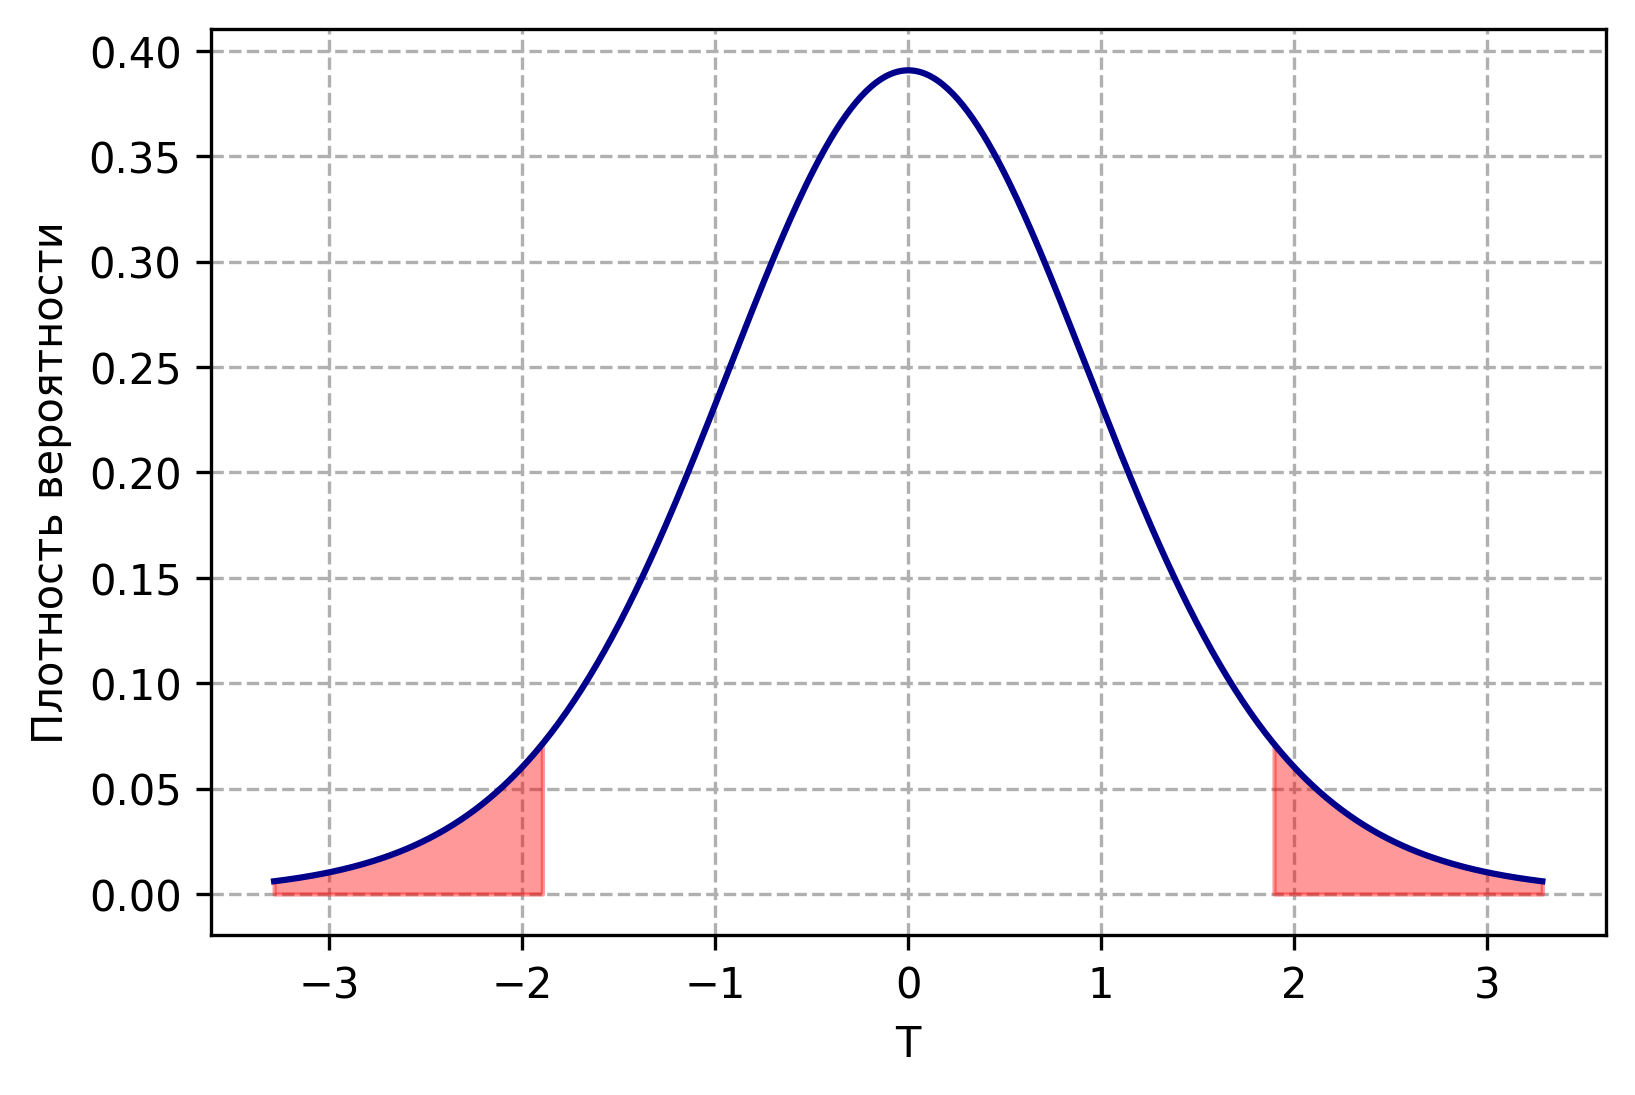

In [20]:
fig, ax = plt.subplots(dpi = 300)

# все применяем к осям ax
ax.plot(t, t_pdf, color = "darkblue");
ax.grid(linestyle = "--");
ax.set_xlabel("T");
ax.set_ylabel("Плотность вероятности");

# убираем сетку назад
ax.set_axisbelow(True)

interval01 = np.linspace(-3 * sigma, t_obs)
interval02 = np.linspace(abs(t_obs), 3 * sigma)

density01, density02 = T.pdf(interval01), T.pdf(interval02)
ax.fill_between(interval01, density01, 
                color = "red", alpha = 0.4);
ax.fill_between(interval02, density02, 
                color = "red", alpha = 0.4);

# сохраняем уже не оси ax,
# а саму картинку fig

fig.savefig("example02.png")

### Бонус для любителей интегралов (и не только)

Есть функция распределения стандартного нормального распределения:

$$
\Phi(x) = \frac{1}{\sqrt{2\pi}}\int\limits_{-\infty}^{x}e^{-\frac{y^2}{2}}dy
$$

Допустим, мы хотим формально найти вероятность для p-value из примера 1:

$$
\text{P}(z > 1.16) = 1 - \text{P}(z < 1.16) = 1 - \Phi(1.16)
$$
$$
\Phi(1.16) = \frac{1}{\sqrt{2\pi}}\int\limits_{-\infty}^{1.16}e^{-\frac{y^2}{2}}dy
$$

Вычислять такие интегралы с нуля не всегда хочется :) Предлагаю познакомиться, если не знакомы, с библиотекой `sympy` для символьных вычислений. Она позволяет упрощать выражения, раскрывать скобки, вычислять пределы, производные, интегралы и прочее. Обычно она уже установлена, но если что, вот ее [документация](https://docs.sympy.org/latest/index.html). 

Импортируем все инструменты этой библиотеки:

In [21]:
from sympy import *

Ключевая идея символьных вычислений – буквы, которые мы определяем в выражениях, распознаются как переменные и коэффициенты в математическом смысле. Так, если мы напишем выражение `(a+b)**2`, предварительно сообщив, что `a` и `b` – это символы, библиотека не будет искать переменные `a` и `b` в Python, а просто рассмотрит запись как «математический пример», который можно решить, например, раскрыв скобки:

In [22]:
a, b = symbols("a b")
expr01 = (a + b) ** 2
expr01

(a + b)**2

In [23]:
# раскрываем скобки – функция expand()
expand(expr01)

a**2 + 2*a*b + b**2

Еще несколько простых примеров.

In [24]:
expr02 = a ** 3 + b ** 3
expr02

a**3 + b**3

In [25]:
# раскладываем на множители – функция factor()
factor(expr02)

(a + b)*(a**2 - a*b + b**2)

In [26]:
expr03 = (a ** 3 + b ** 3) / (a + b) ** 2
expr03

(a**3 + b**3)/(a + b)**2

In [27]:
# сокращаем дроби – функция cancel()
cancel(expr03)

(a**2 - a*b + b**2)/(a + b)

Выглядит вполне вдохновляюще :) Вернемся к интегралам и запишем выражение посерьезнее:

In [28]:
x, y = symbols("x y")

# подынтегральное выражение
f = 1 / (sqrt(2 * pi)) * exp(-y ** 2/2)
f

sqrt(2)*exp(-y**2/2)/(2*sqrt(pi))

Осталось только найти определенный (несобственный) интеграл:

In [29]:
# f – функция, для которой ищем первообразную
# y – название переменной (dy)
# -oo, 1.16 – границы интегрирования

integrate(f, (y, -oo, 1.16))

0.876975596948657

Всё точно! Осталось только смириться со специфическими символами для бесконечности (`-oo` и `oo`) и попробовать еще что-то поинтегрировать и подифференцировать (или вообще уйти работать с матрицами). Больше примеров можно найти в документации.